## Importing Libraries :-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

<br>

## Reading Dataset :-

In [2]:
df = pd.read_csv(r'C:/Users/Aaheli Paul/Major Project - Corizo/red_wine_dataset.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


<br>

## Descriptive Stats :-

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

<br>

## Data Pre-processing and Visualization :-

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

- missing values in 'total sulfur dioxide', 'pH' and 'quality' columns

In [7]:
df.dropna(inplace = True)

In [8]:
#checking for missing data after removal..

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### - count plot of 'quality' variable:

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

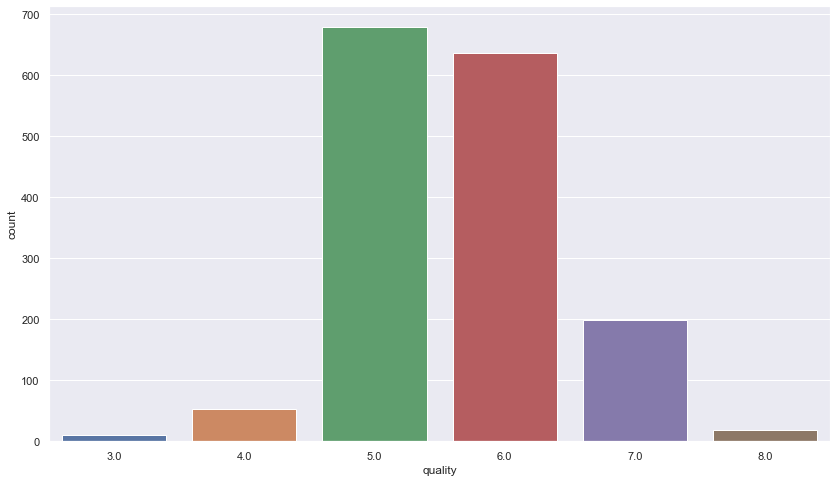

In [9]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.countplot(df['quality'])

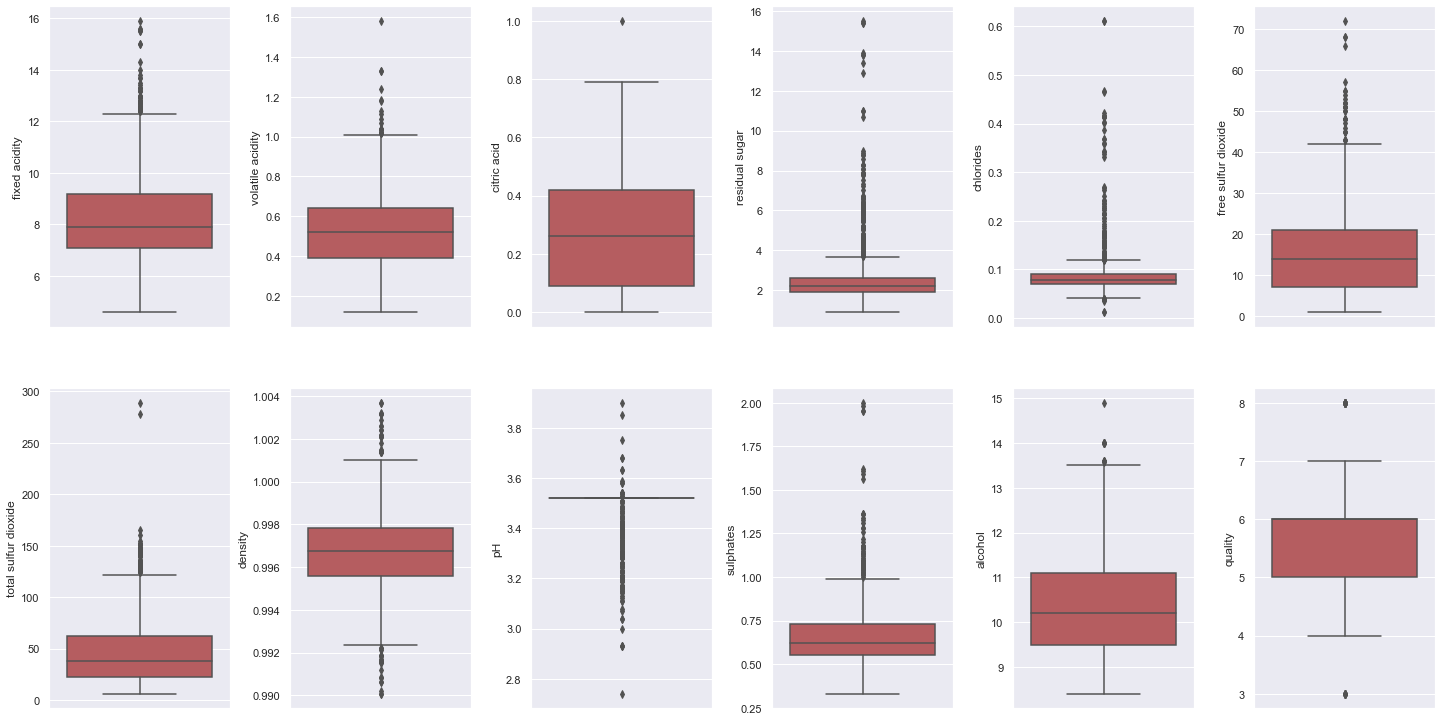

In [10]:
#checking if data has outliers or not:


#creating box plots...

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### - finding correlated columns:

- Method 1

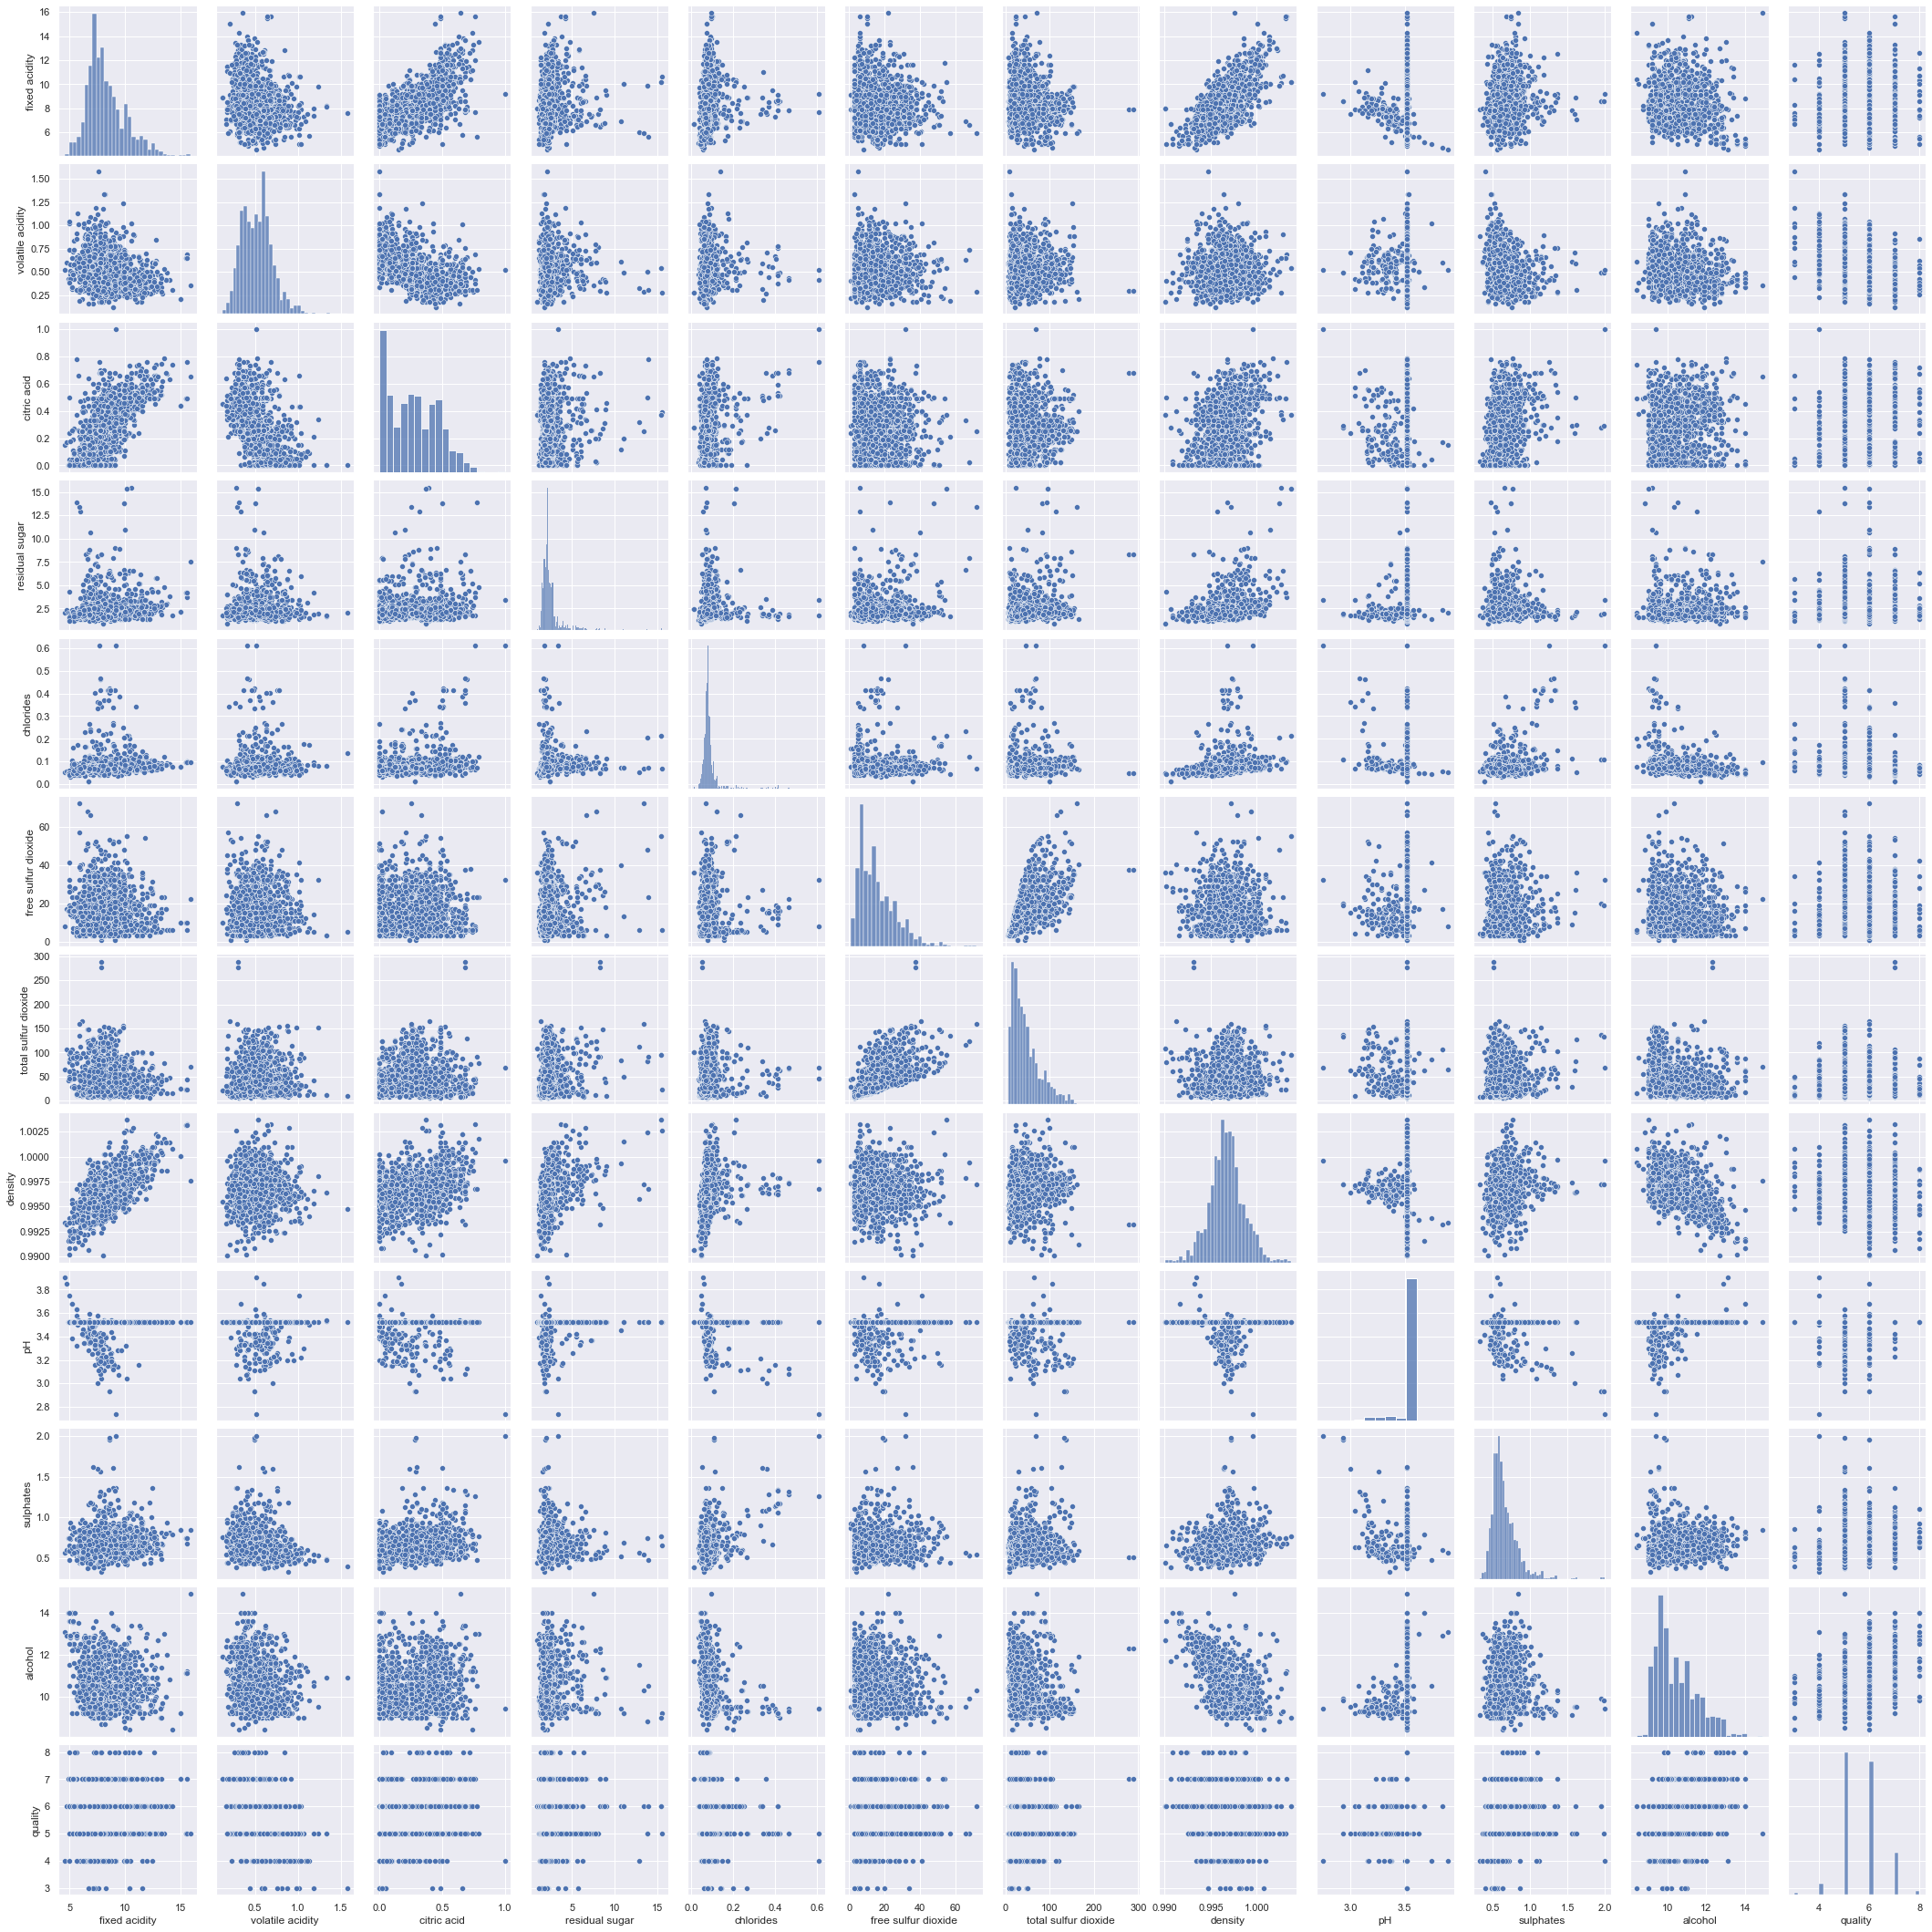

In [11]:
sns.pairplot(df)

- Method 2

<AxesSubplot:>

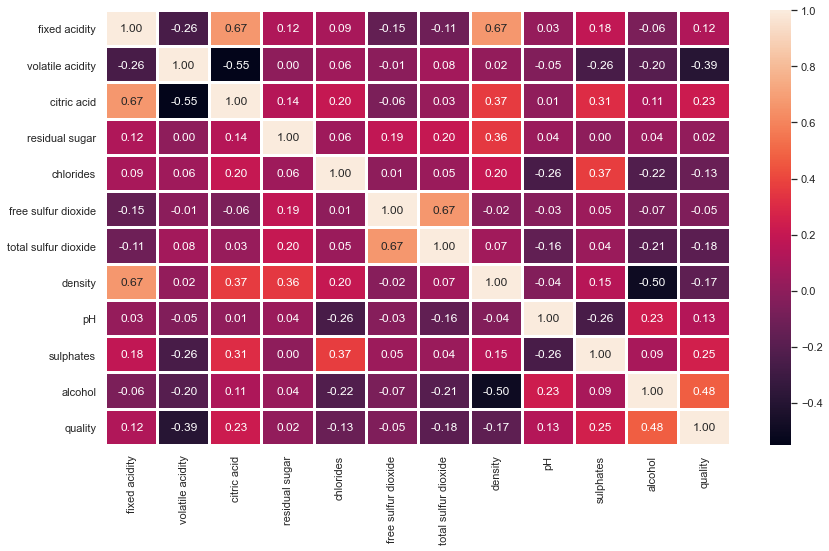

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

### Insights :
<br>
- Alcohol is positively correlated with the quality of the red wine <br>
- Alcohol has a weak positive correlation with the pH value <br>
- Citric acid and density have a strong positive correlation with fixed acidity <br>
- pH has a negative correlation with density, volatile acidity and sulfates <br>
<br>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

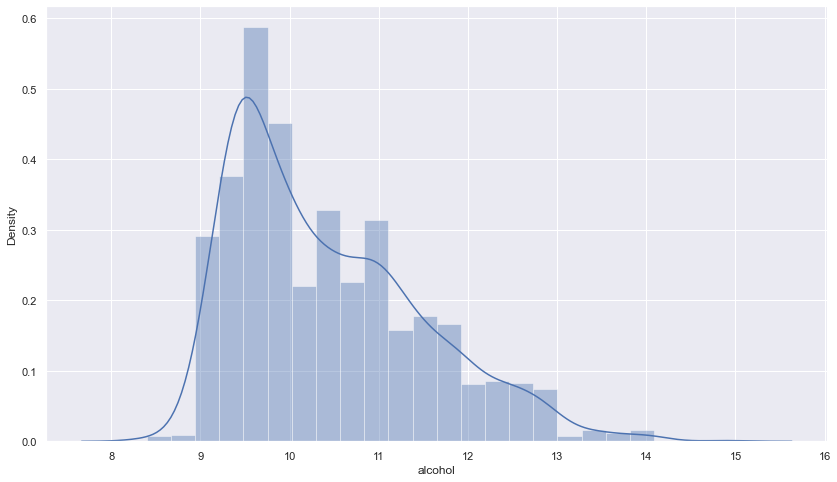

In [13]:
#checking how alcohol concentration is distributed with respect to the quality of the red wine...

sns.distplot(df['alcohol'])

- Observation : Alcohol distribution is positively skewed with the quality of the red wine. <br>

In [14]:
#verifying using skew method...

from scipy.stats import skew
skew(df['alcohol'])

0.8583897443238679

- The output verifies that alcohol is positively skewed. <br>

### - dist plot of all features:

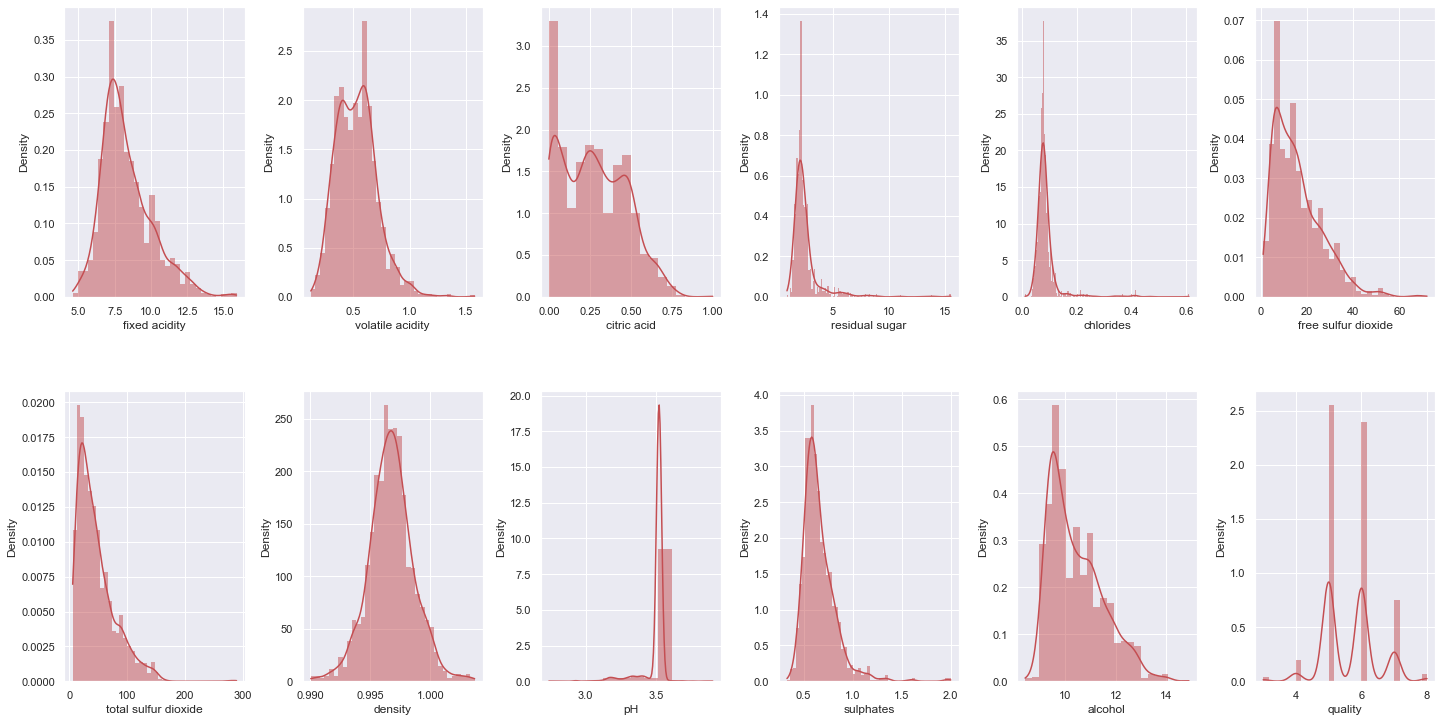

In [15]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, color='r', ax=ax[index], kde=True, stat="density", linewidth=0)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- Observation : The above figures show the distribution of the features. Few of them are normally distributed where other are rightly skewed. The range of each feature is also not huge.

### Alcohol VS Quality:

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

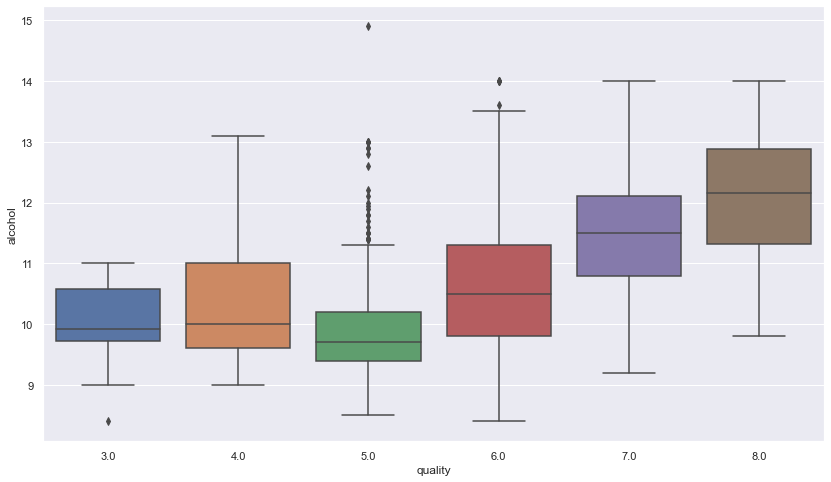

In [16]:
sns.boxplot(x='quality', y='alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

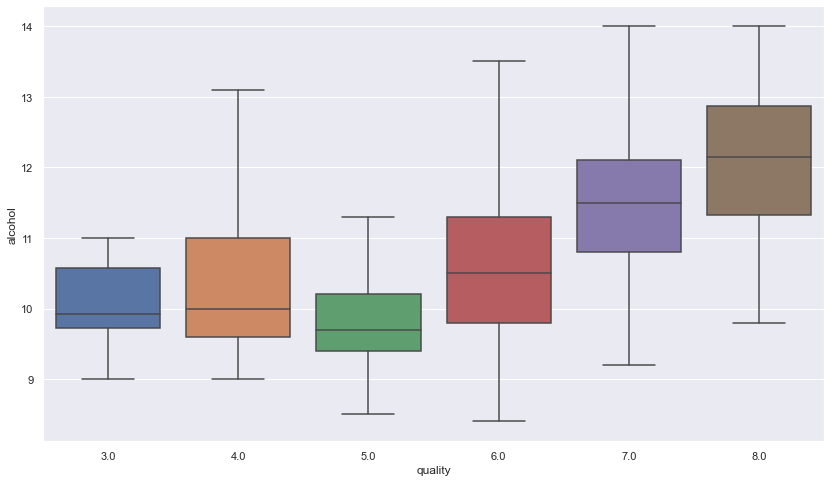

In [17]:
#removing the outliers...

sns.boxplot(x='quality', y='alcohol', data = df, showfliers=False)

- Observation : The higher the alcohol concentration is, the higher the quality of the wine.

### Alcohol VS pH:

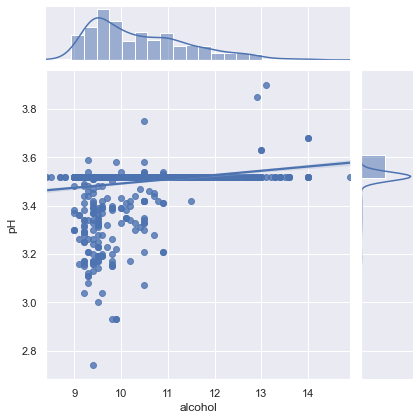

In [18]:
sns.jointplot(x='alcohol',y='pH',data=df, kind='reg')

In [19]:
#quantifying the correlation using Pearson regression from scipy.stats...

from scipy.stats import pearsonr

def get_correlation(column1, column2, df):
    pearson_corr, p_value = pearsonr(df[column1], df[column2])
    print("Correlation between {} and {} is {}".format(column1,column2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [20]:
get_correlation('alcohol','pH', df)

Correlation between alcohol and pH is 0.2335104547387686
P-value of this correlation is 3.311568702763154e-21


In [21]:
df['quality'].value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [25]:
df['quality'].value_counts()

2    679
3    637
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [26]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

### Splitting the dataset into the Training set and Test set:-

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1276, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1276, 1)
Shape of y_test (320, 1)


### Applying classifiers :-

In [29]:
#feature scaling...

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<br>

- K-Nearest Neighbours (KNN)

In [30]:
#fitting classifier to the Training set...

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [31]:
#predicting Cross Validation Score...

cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


CV:  0.674753937007874
Training set:  1.0
Test set:  0.65625


<br>

- Decision Tree Classification

In [33]:
#fitting classifier to the Training set...

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [34]:
#predicting Cross Validation Score...

cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.5932701771653542
Training set:  1.0
Test set:  0.584375


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


<br>

- Random Forest Classification

In [35]:
#fitting classifier to the Training set...

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [36]:
#predicting Cross Validation Score...

cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


CV:  0.6896653543307086
Training set:  1.0
Test set:  0.715625


<br>

In [37]:
models = [('K-Nearest Neighbors (KNN)', accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification', accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [38]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy(training)', 'Accuracy(test)', 'Cross-Validation'])
predict

,Model,Accuracy(training),Accuracy(test),Cross-Validation
0,K-Nearest Neighbors (KNN),1.0,0.656250,0.674754
1,Decision Tree Classification,1.0,0.584375,0.593270
2,Random Forest Tree Classification,1.0,0.715625,0.689665


### Visualizing Models Performance:-

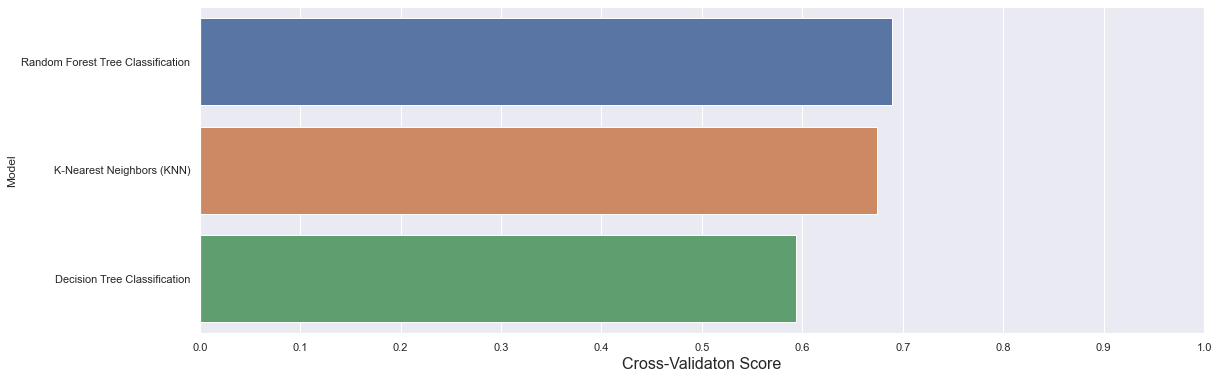

In [39]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

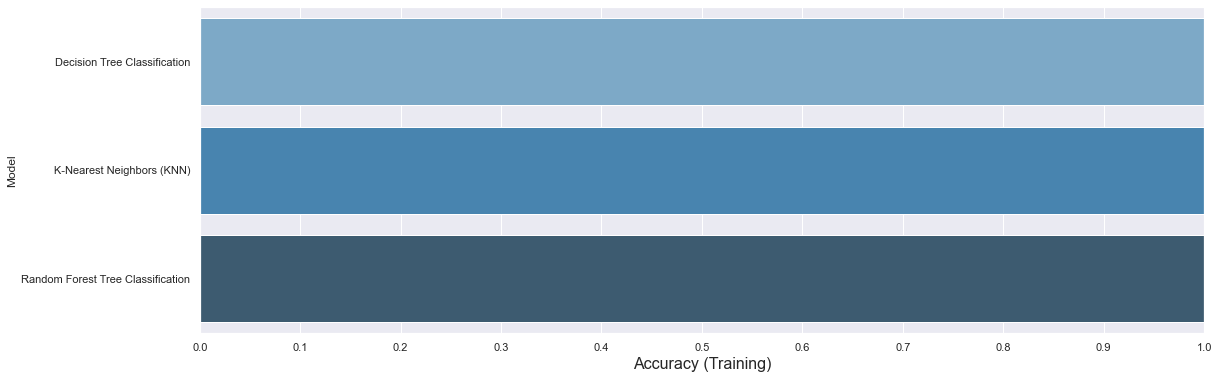

In [46]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axe)
axe.set_xlabel('Accuracy (Training)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

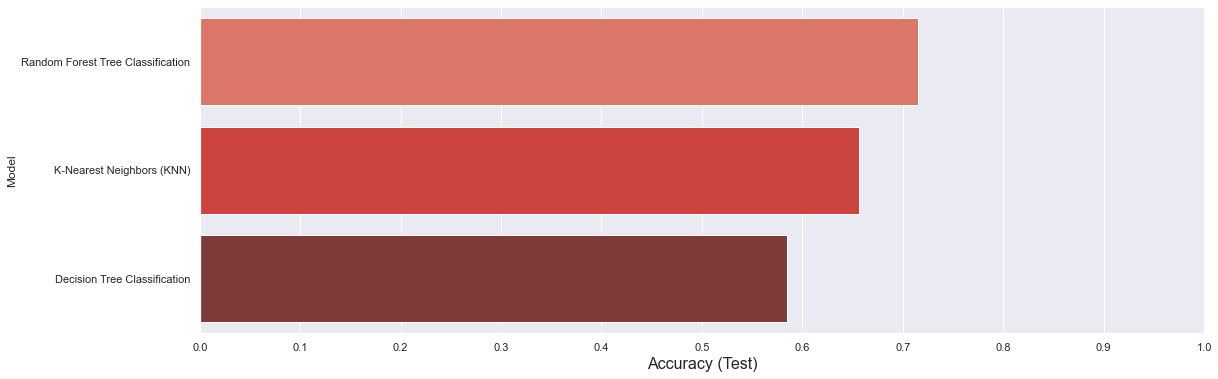

In [47]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axe)
axe.set_xlabel('Accuracy (Test)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

### Conclusion:-

Random Forest Tree Classifier gives the most accuracy.